# Machine Learning

## Section 1:

Use the k-means clustering algorithm on the protein data. 
Make sure to use the elbow plot to determine the ideal number of clusters. Write an appropriate figure caption for the elbow plot. Recommend using pandas and sklearn.

### Setting Up

In [2]:
# set up working directory
import os
os.chdir('/Users/kathykliu/Desktop/qbio_490_kailin/analysis_data')

# import cptac
import cptac

# list data sets available with list_datasets()
cptac.list_datasets()

# download the breast cancer data set
cptac.download(dataset="Brca")

# load the breast cancer data set
brca = cptac.Brca()

# get the protein data
protein_data = brca.get_proteomics() 
protein_data 
# collapse the column names and get rid of the database_IDs
protein_data.columns = protein_data.columns.get_level_values(0) 
protein_data

Name,A1BG,A2M,A2ML1,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,...,ZSCAN31,ZSWIM8,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,-0.6712,-0.2075,2.7959,1.3969,-1.0899,NaN,1.6708,-0.3484,-0.4756,-0.7299,...,-5.2868,-0.6536,0.3384,2.1169,1.3910,-2.1230,0.9136,-0.8082,-1.4793,0.9136
CPT001846,1.3964,1.3302,-5.0948,0.7674,-1.6845,NaN,2.1022,-0.5814,0.2916,-2.2857,...,-0.7592,0.4711,0.6018,0.2062,-0.2137,-2.1219,0.0860,2.5814,-0.2852,-0.1074
X01BR001,2.0219,1.6269,-3.2943,0.3352,-1.0739,1.2255,0.2754,-1.1187,-0.0534,-0.2519,...,NaN,0.2306,-0.3010,0.3395,-0.5316,NaN,0.4996,0.7622,-1.5607,0.0256
X01BR008,-0.5290,0.3267,1.4342,0.4938,-2.8676,NaN,NaN,-1.0691,-0.3643,-1.8173,...,-2.1789,0.2695,0.1506,1.0498,0.7546,1.7889,-0.2499,-0.2590,-0.1263,0.3725
X01BR009,1.2556,3.4489,2.8043,-0.2956,-1.7261,NaN,NaN,-2.0471,-0.3547,-0.8298,...,-2.3990,-0.2596,0.1898,-0.5010,-0.4189,0.3080,0.5057,0.2181,-0.2288,-0.2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,-0.6610,-0.6402,-4.8578,1.2319,-1.6491,NaN,NaN,-0.3074,-0.3074,-0.0266,...,-0.2528,0.5090,0.0306,0.4908,-0.5570,2.3864,0.3764,-0.6974,1.3541,1.1123
X21BR002,-1.3735,0.4227,-4.9553,0.6327,-3.1434,NaN,NaN,0.3071,0.7562,-1.6912,...,-3.3351,0.1548,1.0792,-0.6619,-1.4444,-0.3704,0.4909,0.3938,0.2992,-0.3494
X21BR010,1.1583,0.3329,-5.7358,-0.1658,-2.0413,-1.2433,0.9090,-0.2410,0.6717,-0.1651,...,-0.7054,0.2752,0.8850,-2.6704,-0.9444,-1.9717,0.0650,0.6300,-0.0686,0.1798


### Elbow Plot

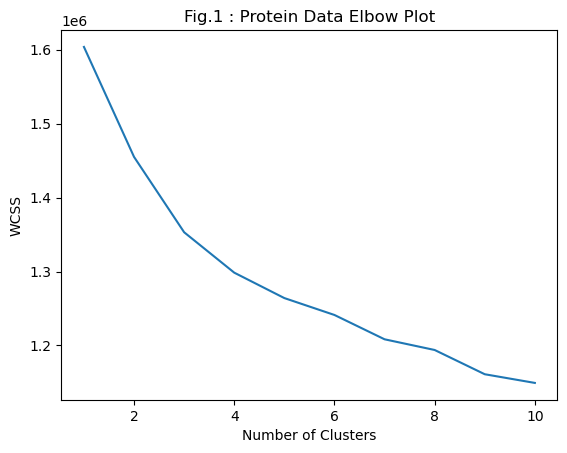

In [46]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

# remove patients with NaN values
protein_df = protein_data.dropna(axis=1)
protein_df

#plot elbow plot
wcss = []
for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(protein_df)
    wcss.append(clustering.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Fig.1 : Protein Data Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Figure 1 shows the elbow plot shows the number of clusters for the protein data. The "elbow" occurs at around 3 clusters.

In [23]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

#Load Data
data = protein_df
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
df.shape

(122, 2)

In [24]:
# initialize the class object
kmeans = KMeans(n_clusters= 3)
 
# predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[1 1 1 1 1 0 0 1 1 1 2 2 0 1 0 1 2 0 1 1 1 0 2 0 1 2 2 0 1 0 2 0 0 2 0 1 0
 1 1 2 1 2 2 0 2 2 1 2 2 1 1 0 2 2 2 2 2 0 2 1 1 0 2 2 2 1 1 2 2 2 1 2 0 1
 0 0 0 2 2 0 2 0 0 2 2 0 0 0 0 1 0 2 0 2 1 2 2 0 0 0 2 0 2 2 2 0 0 0 0 0 2
 2 1 1 1 1 0 2 2 2 2 2]


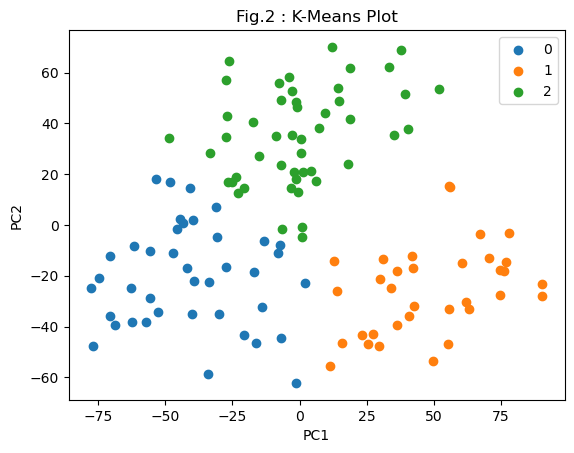

In [37]:
# getting unique labels
u_labels = np.unique(label)
u_labels
 
# plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.title('Fig.2 : K-Means Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Section 2
Run a principal component analysis on the RNA data. Choose a clinical variable to color your PCA by. Write an appropriate figure caption.
Please use the RNA data from TCGAbiolinks not CPTAC

In [32]:
# import functions
from sklearn.preprocessing import StandardScaler

# load rna clinical data
rna_clinical = pd.read_csv("/Users/kathykliu/Desktop/qbio_490_kailin/analysis_data/new_brca_rna_clincial_data.csv")
# subset for barcode and chosen clincal variable (pathological stage)
clinical_dat = {'Barcode':rna_clinical.loc[:, "barcode"],'Stage':rna_clinical.loc[:, "ajcc_pathologic_stage"]}
target_df = pd.DataFrame(clinical_dat, columns=['Barcode','Stage'])
barcode_dict = pd.Series(target_df.Stage.values,index=target_df.Barcode).T

In [34]:
# load rna counts data
rna_counts = pd.read_csv("/Users/kathykliu/Desktop/qbio_490_kailin/analysis_data/new_brca_rna_count_data.csv")
# perform dimensionality reduction
rna_counts = rna_counts.iloc[:, 2:len(rna_counts.columns)]

# note that for rna data, patients are in the columns 
# flip the rows and columsn for rna data
rna_counts = rna_counts.T
rna_counts['barcodes'] = rna_counts.index
rna_counts['stage'] = rna_counts['barcodes'].map(barcode_dict)
rna_counts = rna_counts.drop(['barcodes'],axis =1)

# remove patients with NaN values
rna_counts = rna_counts.dropna(axis=0)

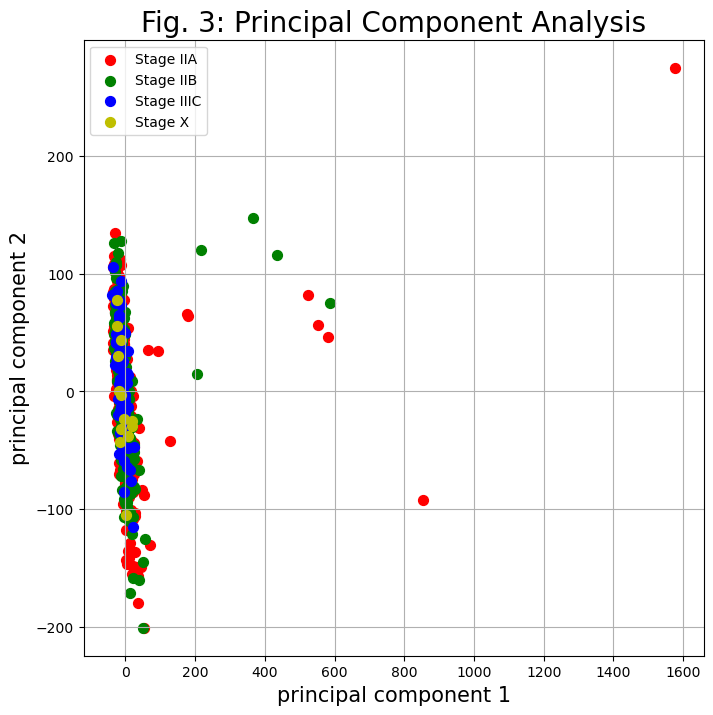

In [47]:
#PCA

# standardize the rna_counts
x = rna_counts.loc[:, rna_counts.columns != 'stage'].values
x = StandardScaler().fit_transform(x)

# run PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# plot PCA
principalDf['stage'] = rna_counts['stage'].values
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('Fig. 3: Principal Component Analysis', fontsize = 20)
targets = pd.unique(principalDf.loc[:, "stage"])
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['stage'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'pc1']
               , principalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Section 3

Create two UMAP's of the RNA data. One colored with the cluster number from running k-means on the RNA data and the second colored with a single gene's expression. Write appropriate figure captions.
a.	If the umap is not working correctly, you can try creating a tSNE instead.
b.	If you are following the scanpy tutorial, feel free to use a different clustering method like "louvain" or "leiden".

<function matplotlib.pyplot.show(close=None, block=None)>

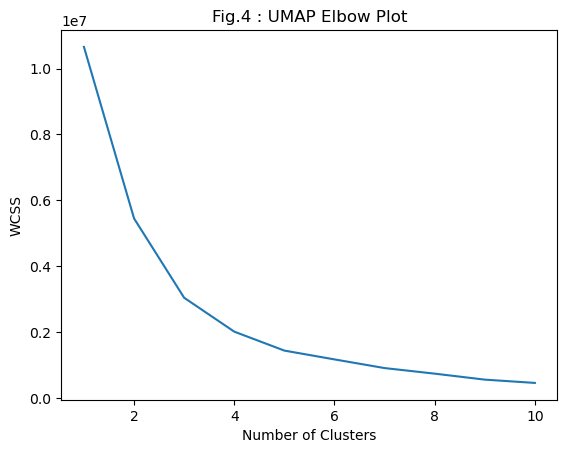

In [39]:
# elbow plot for UMAP
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(principalComponents)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Fig.4 : UMAP Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

Figure 4 shows the elbow plot shows the number of clusters for the protein data. The "elbow" occurs at around 3 clusters.

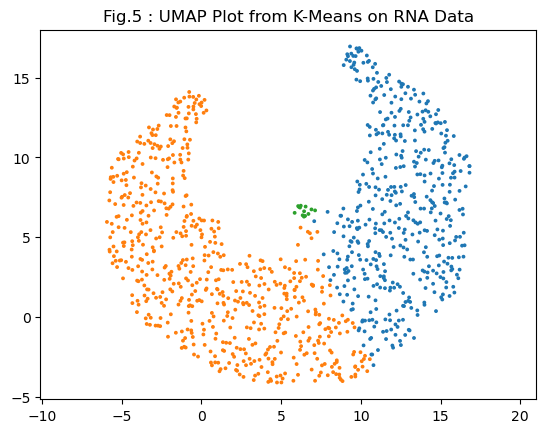

In [44]:
# k-means
k_data = principalDf.iloc[:, :-1]
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
prediction = kmeans.fit_predict(k_data)

# import umap
# in terminal first run: conda config --add channels conda-forge
# then run in terminal: conda install -c conda-forge umap-learn
import umap

# do the umap using the k-means
umap_var = umap.UMAP(n_neighbors = 30, min_dist = 1)
refined = umap_var.fit_transform(k_data)
plt.scatter(refined[:, 0], refined[:, 1], s = 3, c = [sns.color_palette()[data] for data in prediction])

plt.gca().set_aspect('equal', 'datalim')
plt.title('Fig.5 : UMAP Plot from K-Means on RNA Data')
plt.xlabel('')
plt.ylabel('')
plt.show()

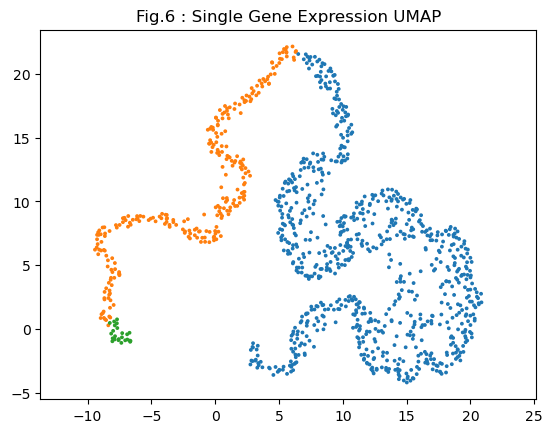

In [45]:
# single gene expression UMAP

# remove NaN values
rna_counts = rna_counts.dropna(axis=1)
gene_data = {'gene_1':rna_counts.iloc[:, 1],'gene_2':rna_counts.iloc[:, 2]}
gene_df = pd.DataFrame(gene_data, columns=['gene_1','gene_2'])
prediction = kmeans.fit_predict(gene_df)

# now do the umap procedure
umap_var = umap.UMAP(n_neighbors = 30, min_dist = 1)
refined = umap_var.fit_transform(gene_df)
plt.scatter(refined[:, 0], refined[:, 1], s = 3, c = [sns.color_palette()[data] for data in prediction])

plt.gca().set_aspect('equal', 'datalim')
plt.title('Fig.6 : Single Gene Expression UMAP')
plt.xlabel('')
plt.ylabel('')
plt.show()

## Section 4

Extra credit: Create a hierarchical clustering heatmap using either the RNA or protein data. Write an appropriate figure caption.

## Section 5

Answer the following questions in a few sentences each.

a.	Looking over your figures, does anything surprise you? Why or why not?

I found the results of the PCA plot based on ajcc_pathological_stage interesting. Instead of having clearer clusters between the different stages of clusters, they were all clustered to the left of the plot. Furthermore, there were quite a few outliers from Stage IIA and Stage IIB. I’m not too sure how to interpret the reasoning behind why it was clustered this way. Potentially this could relate to how the elbow plot in Figure 1 was also unclear with how many clusters there should be from the protein data.

b.	Now that you have clusters, what information would you like to know about each cluster? How would you get this information?

It would be interesting to see how the clinical variables would change the clustering. Of course, with different variables, different types of information would be shown. or example, ethnicity may have clearer clusters because there are only two unique types of data in that column.  To get this information, I would first need to make my elbow plot more specific. Potentially I could focus on a few genes to get a clearer elbow. To do this, I would need a different framework; the current one generalizes all the protein data. Then, I would create a K-Means graph using ethnicity and use the side by side plotting method from Week 9(intro with 4 graphs)/Week 10(second proteomics hw assignment) to compare the two graphs. Note: 2  things would be changed between the two graphs so maybe I should make the current elbow plot using stage more specific too (ex. pick genes)

c.	Brainstorm two ways you could combine RNA and Protein information into one figure. Provide two sketches of these figures.

I'm not too sure how to answer this but I'm thinking that it might be something similar to the Volcano plots we did in R where we looked at the differential expression between genes and used that information to identify which proteins to then focus on. Another thing we learned was the heatmap where RNA was on the y-axis and protein expression was on the x-axis. However, these answers might not be what the question is looking for since it's not PCA analysis. 